# Interactive visualization of propagation of light in Jupyter notebook

Matplotlib present useful visualization tools for showing the intensity profiles at a distance z in an interactive fashion in jupyter notebooks. Here, we show how to use it.


In the first place, we well determine the intensity distribution XZ for an object. 

In [1]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from numpy.fft import fft, ifft
from scipy.signal import convolve2d

from ipywidgets import interactive


In [2]:
# Initial parameters
x0 = np.linspace(-1050 * um, 1050 * um, 1024 * 2)
z0 = np.linspace(-0.125 * um, 4 * mm, 1024 * 4)
wavelength = 0.6238 * um * 10


In [3]:
# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=2000 * um, theta=0. * degrees)

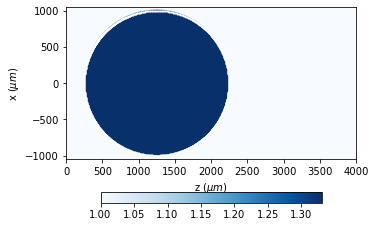

In [4]:
# insert cylinder
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

u1.cylinder(r0=(0, 1.25 * mm),
          radius=(1 * mm, 1 * mm),
          refractive_index=1.33,
          angle=0)
u1.draw_refractive_index(scale='scaled', colorbar_kind='horizontal')


In [5]:
#loading the incident field in the simulation
u1.incident_field(u0)


In [6]:
# WPM propagation
u1.WPM(verbose=False)

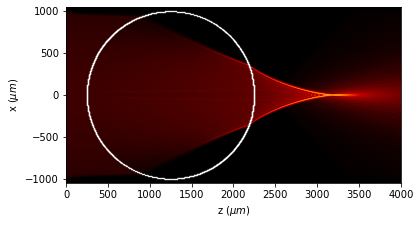

In [7]:
#simple drawing
u1.draw(logarithm=True, scale='scaled', draw_borders=True)


In [8]:
Imax = u1.intensity().max()


In [9]:
def __interact2__(i):
    plt.plot(u1.x, abs(intensity[:, i]), 'k')
    plt.title("z = {:2.3f} mm".format(u1.z[i] / 1000))
    plt.ylim(0, Imax)
    plt.xlim(-100 * um, 100 * um)


In [11]:
%matplotlib widget

interactive(__interact2__, i=(0,len(u1.z)-1,1))
plt.show()

<img src="interactive.png" width="400">